# Bifurcation theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import phase_space_plotting as psp

## Bifurcations on the plane

### Saddle-node

In [40]:
def saddle_node_bifurcation(mu):
    xlim = (-2, 2)
    ylim = (-2, 2)

    def dx_dt(x, t):
        return [mu - x[0]**2, -x[1]]
    
    fig, ax = plt.subplots(figsize=(8, 4))
    if mu >=0:
        ax.vlines([-np.sqrt(mu), np.sqrt(mu)], *ylim, linestyle='--', linewidth=1, color='orange')

    psp.plot_field(dx_dt, xlim, ylim, scale=50, ax=ax)

In [39]:
slider = widgets.FloatSlider(value=-2, min=-2, max=2, step=0.01, description=r'$\mu$')

_ = widgets.interact(saddle_node_bifurcation, mu=slider)

interactive(children=(FloatSlider(value=-2.0, description='$\\mu$', max=2.0, min=-2.0, step=0.01), Output()), …

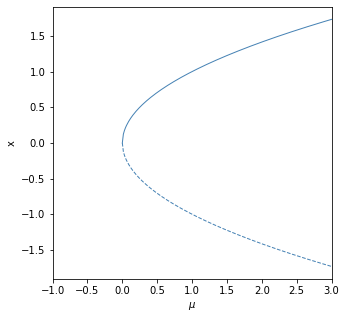

In [47]:
xlim = (-1, 3)
mu = np.linspace(0, 3, 200)
x1 = np.sqrt(mu)
x2 = -np.sqrt(mu)

plt.figure(figsize=(5, 5))
plt.xlim(xlim)
plt.plot(mu, x1, color='steelblue', linewidth=1)
plt.plot(mu, x2, color='steelblue', linewidth=1, linestyle='--')
plt.xlabel(r'$\mu$')
plt.ylabel('x')
plt.show()